# Movie Rating Prediction using IMDB Movie review Dataset

This is a Natural Language processing project which predicts the rating of a movie (positive/negative) based on the review. 

First we import all the necessary libraries

In [33]:
import pandas as pd 
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We use the IMDB Dataset and import it using pandas 

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The head shows that the dataset has two columns. 1st column has review in the form of text. The second column has the sentiment, viz. whether the review is positive or negative

We then define a function to clean/preprocess the text reviews. We remove the punctuations, stopwords and breaks that can be seen in the reviews

In [4]:
def clean_text(x):
    """
    Remove breaks: <br /><br />
    Remove Punctuations: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    Remove stopwords
    """
    x = ' '.join(x.split('<br /><br />'))
    no_punctuation = [ch for ch in x if ch not in string.punctuation]
    x = ''.join(no_punctuation)
    x = ' '.join([ch for ch in x.split() if ch.lower() not in stopwords.words('english')])
    x = ' '.join([ch for ch in x.split() if ch not in string.digits])
    return x.split()

In [5]:
from nltk.corpus import stopwords

Let us take a look at one of the text reviews

In [34]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

It can be seen that the review contains punctuations, stopwords and other noise. Let us now execute our 'clean_text' function on this review.

In [7]:
clean_text(df['review'][0])

['One',
 'reviewers',
 'mentioned',
 'watching',
 'Oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'manyAryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'sh

Now our review is returned in the form of a list without the noise 

Sentiment analysis based on the length of the review: We plot two countplots of lengths of reviews. One with the positive sentiment as outcome and the other as negative sentiment as outcome The plots can be seen below

In [8]:
# Insertion of a 'Length of review' column 
df.insert(2,'Length of rev',0)
for i in range(0,len(df['review'])):
    df['Length of rev'][i] = len(df['review'][i])


<ipython-input-8-cf18d4467b73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of rev'][i] = len(df['review'][i])


array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

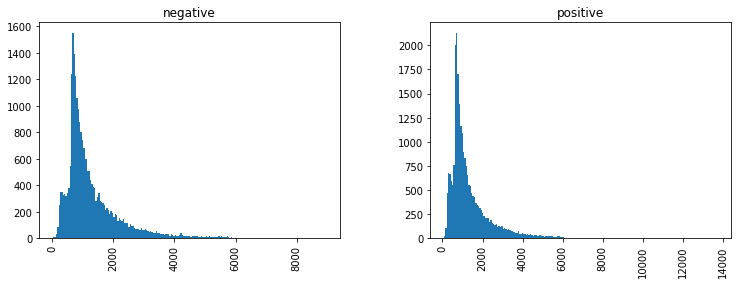

In [10]:
df.hist(column='Length of rev', by='sentiment', bins=200,figsize=(12,4))

It can be seen that the sentiment does not depend on the length of the review. The fact that in both cases, the length of review is similarly distributed, supports our analysis

Now that we have preprocessed the data, let us perform some machine learning on it. We start by splitting our Data using train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3)

Now we vectorise our dataset using the sklearn CountVectorizer. This provides the frequency of the occurence of a word in the data. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_words = CountVectorizer(analyzer=clean_text).fit(X_train)

In [15]:
print(count_words.transform([df['review'][0]]))

  (0, 14900)	1
  (0, 15155)	2
  (0, 22313)	1
  (0, 22340)	1
  (0, 25290)	1
  (0, 26271)	1
  (0, 33546)	1
  (0, 33724)	1
  (0, 38428)	1
  (0, 42744)	1
  (0, 45629)	1
  (0, 47808)	1
  (0, 48253)	1
  (0, 48630)	1
  (0, 48817)	4
  (0, 50346)	1
  (0, 58589)	1
  (0, 61809)	1
  (0, 66411)	1
  (0, 69549)	1
  (0, 72696)	1
  (0, 73767)	1
  (0, 73890)	1
  (0, 75818)	1
  (0, 76226)	1
  :	:
  (0, 142787)	1
  (0, 143454)	1
  (0, 144718)	1
  (0, 146424)	1
  (0, 147415)	1
  (0, 147602)	2
  (0, 148942)	1
  (0, 149921)	1
  (0, 151256)	1
  (0, 152222)	1
  (0, 152906)	1
  (0, 154168)	1
  (0, 154984)	1
  (0, 155536)	1
  (0, 156669)	1
  (0, 157473)	1
  (0, 157595)	4
  (0, 158538)	1
  (0, 158554)	1
  (0, 158999)	1
  (0, 159770)	2
  (0, 160592)	2
  (0, 160903)	1
  (0, 160915)	1
  (0, 161622)	1


In [16]:
print(len(count_words.vocabulary_))

162290


Total number of different words in our dataset are 1,62,290! Further, rev_count_complete contains the vectorised count of all the words in our Training Dataset

In [17]:
featureNames = count_words.get_feature_names()

In [18]:
rev_count_complete = count_words.transform(X_train)

We then use the Tfidf to calculate the Term Frequency and the Inverse Document Frequency

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
rev_count_complete.get_shape()

(35000, 162290)

In [21]:
type(rev_count_complete)

scipy.sparse.csr.csr_matrix

In [22]:
tfid = TfidfTransformer().fit(rev_count_complete)

In [23]:
tfidf_revs = tfid.transform(rev_count_complete)

Now that we have a processed dataset, we train the model. In our case we use the Naive-Bayes Algorithm as well as the RandomForrest Classifier. 

In [24]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB().fit(tfidf_revs,y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100).fit(tfidf_revs,y_train)

Now that we have trained our model, lets predict the values based off of the data from the test set

In [26]:
count_test = count_words.transform(X_test)

In [27]:
tfid_test = tfid.transform(count_test)

In [28]:
nb_predic = naive_bayes_model.predict(tfid_test)

In [29]:
rf_predic = rf_model.predict(tfid_test)

We have now predicted the values using both Naive Bayes and the RandomForrest Classifier. Let us look at the classification report to see which one of the two algorithms, provides a better fit. 

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,nb_predic))

              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      7475
    positive       0.88      0.85      0.87      7525

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [32]:
print(classification_report(y_test,rf_predic))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      7475
    positive       0.87      0.84      0.85      7525

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



We can see that the Naive-Bayes Algorithm provided an average accuracy of around 0.87, whereas the Random forrest classifier provided a frequency of 0.85. 